In [5]:
# Import the dependencies.
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
from config import weather_api_key
import time
from scipy.stats import linregress

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city

'biloela'

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        # If an error is experienced, skip the city.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | verkhnyaya toyma
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | taoudenni
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | dawlatabad
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | sinkat
City not found. Skipping...
Processing Record 19 of Set 1 | port hardy
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 o

Processing Record 35 of Set 4 | pevek
Processing Record 36 of Set 4 | mangrol
Processing Record 37 of Set 4 | bambous virieux
Processing Record 38 of Set 4 | yulara
Processing Record 39 of Set 4 | agirish
Processing Record 40 of Set 4 | zigong
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | dovers
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | nantucket
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | saquarema
Processing Record 48 of Set 4 | tortoli
Processing Record 49 of Set 4 | mitchell
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | kamaishi
Processing Record 3 of Set 5 | bago
Processing Record 4 of Set 5 | yarmouth
Processing Record 5 of Set 5 | matamoros
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | sambava
Processing Record 8 of Set 5 | alpena
P

Processing Record 26 of Set 8 | belyy yar
Processing Record 27 of Set 8 | nevelsk
Processing Record 28 of Set 8 | ketou
Processing Record 29 of Set 8 | sajanan
Processing Record 30 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 31 of Set 8 | san juan
Processing Record 32 of Set 8 | qandala
Processing Record 33 of Set 8 | la ronge
Processing Record 34 of Set 8 | erzin
Processing Record 35 of Set 8 | pimentel
Processing Record 36 of Set 8 | malwan
City not found. Skipping...
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | mookane
Processing Record 39 of Set 8 | rujiena
Processing Record 40 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 41 of Set 8 | vagay
Processing Record 42 of Set 8 | los llanos de aridane
Processing Record 43 of Set 8 | dongsheng
Processing Record 44 of Set 8 | seoul
Processing Record 45 of Set 8 | manokwari
Processing Record 46 of Set 8 | lovozero
Processing Record 47 of Set 8 | bilibino
Process

Processing Record 18 of Set 12 | zaterechnyy
Processing Record 19 of Set 12 | liwale
Processing Record 20 of Set 12 | lufilufi
Processing Record 21 of Set 12 | polewali
Processing Record 22 of Set 12 | omboue
Processing Record 23 of Set 12 | namie
Processing Record 24 of Set 12 | ouargaye
Processing Record 25 of Set 12 | lumding
Processing Record 26 of Set 12 | jieshi
Processing Record 27 of Set 12 | tura
Processing Record 28 of Set 12 | khao yoi
Processing Record 29 of Set 12 | abadiania
Processing Record 30 of Set 12 | escuinapa
Processing Record 31 of Set 12 | tarauaca
Processing Record 32 of Set 12 | azul
Processing Record 33 of Set 12 | cartagena del chaira
Processing Record 34 of Set 12 | san francisco
Processing Record 35 of Set 12 | acaponeta
Processing Record 36 of Set 12 | okhotsk
Processing Record 37 of Set 12 | goma
Processing Record 38 of Set 12 | moranbah
Processing Record 39 of Set 12 | nizwa
Processing Record 40 of Set 12 | nokaneng
Processing Record 41 of Set 12 | svec

In [11]:
city_data

[{'City': 'Yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': 74.28,
  'Humidity': 43,
  'Cloudiness': 75,
  'Wind Speed': 6.91,
  'Country': 'CA',
  'Date': '2021-08-06 22:51:48'},
 {'City': 'Verkhnyaya Toyma',
  'Lat': 62.2349,
  'Lng': 44.9985,
  'Max Temp': 51.44,
  'Humidity': 71,
  'Cloudiness': 98,
  'Wind Speed': 4.09,
  'Country': 'RU',
  'Date': '2021-08-06 22:51:49'},
 {'City': 'Bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 84.94,
  'Humidity': 71,
  'Cloudiness': 36,
  'Wind Speed': 5.68,
  'Country': 'US',
  'Date': '2021-08-06 22:51:49'},
 {'City': 'Bluff',
  'Lat': -46.6,
  'Lng': 168.3333,
  'Max Temp': 38.8,
  'Humidity': 67,
  'Cloudiness': 100,
  'Wind Speed': 22.93,
  'Country': 'NZ',
  'Date': '2021-08-06 22:51:49'},
 {'City': 'East London',
  'Lat': -33.0153,
  'Lng': 27.9116,
  'Max Temp': 61.29,
  'Humidity': 73,
  'Cloudiness': 80,
  'Wind Speed': 6.22,
  'Country': 'ZA',
  'Date': '2021-08-06 22:51:50'},
 {'City': 'Jamestown',
  'Lat

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,74.28,43,75,6.91,CA,2021-08-06 22:51:48
1,Verkhnyaya Toyma,62.2349,44.9985,51.44,71,98,4.09,RU,2021-08-06 22:51:49
2,Bethel,41.3712,-73.4140,84.94,71,36,5.68,US,2021-08-06 22:51:49
3,Bluff,-46.6000,168.3333,38.80,67,100,22.93,NZ,2021-08-06 22:51:49
4,East London,-33.0153,27.9116,61.29,73,80,6.22,ZA,2021-08-06 22:51:50
5,Jamestown,42.0970,-79.2353,81.72,57,40,9.22,US,2021-08-06 22:51:50
6,Ancud,-41.8697,-73.8203,45.93,77,74,11.41,CL,2021-08-06 22:48:12
7,Castro,-24.7911,-50.0119,54.00,93,91,5.35,BR,2021-08-06 22:51:50
8,Port Alfred,-33.5906,26.8910,57.60,79,39,4.16,ZA,2021-08-06 22:51:51
9,Kapaa,22.0752,-159.3190,84.18,79,75,4.00,US,2021-08-06 22:50:18


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-08-06 22:51:48,62.4560,-114.3525,74.28,43,75,6.91
1,Verkhnyaya Toyma,RU,2021-08-06 22:51:49,62.2349,44.9985,51.44,71,98,4.09
2,Bethel,US,2021-08-06 22:51:49,41.3712,-73.4140,84.94,71,36,5.68
3,Bluff,NZ,2021-08-06 22:51:49,-46.6000,168.3333,38.80,67,100,22.93
4,East London,ZA,2021-08-06 22:51:50,-33.0153,27.9116,61.29,73,80,6.22
5,Jamestown,US,2021-08-06 22:51:50,42.0970,-79.2353,81.72,57,40,9.22
6,Ancud,CL,2021-08-06 22:48:12,-41.8697,-73.8203,45.93,77,74,11.41
7,Castro,BR,2021-08-06 22:51:50,-24.7911,-50.0119,54.00,93,91,5.35
8,Port Alfred,ZA,2021-08-06 22:51:51,-33.5906,26.8910,57.60,79,39,4.16
9,Kapaa,US,2021-08-06 22:50:18,22.0752,-159.3190,84.18,79,75,4.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

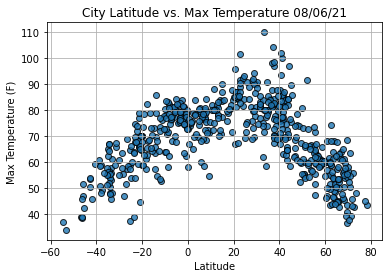

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

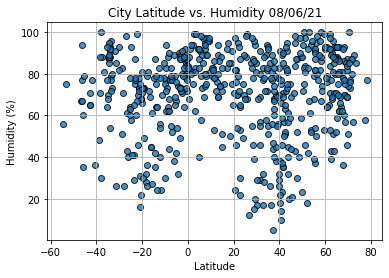

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

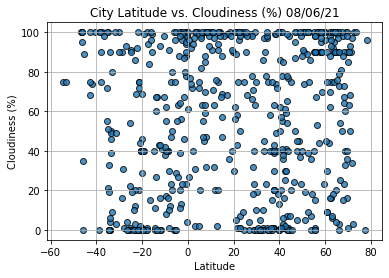

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

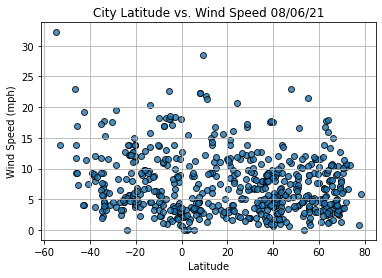

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
563     True
564    False
565    False
566     True
567    False
Name: Lat, Length: 568, dtype: bool

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

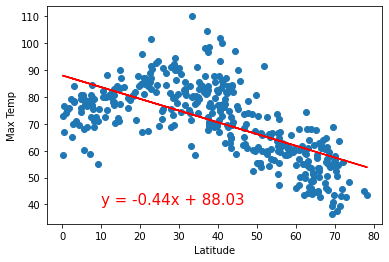

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

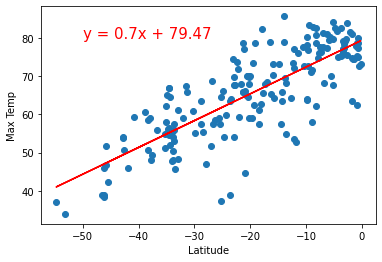

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

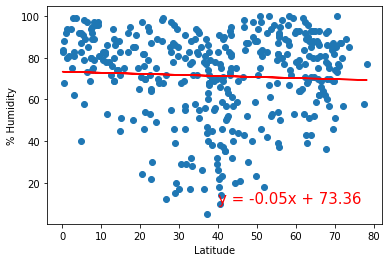

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

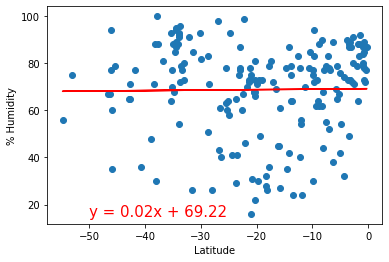

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

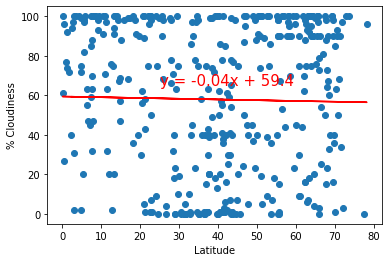

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(25,65))

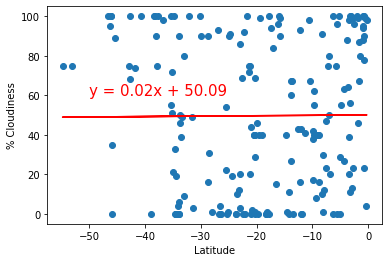

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

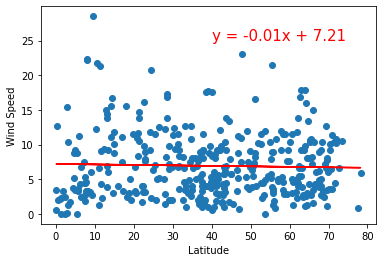

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

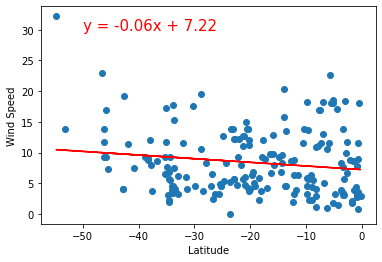

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))